In [73]:
## Setup
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from random import seed
import copy
import json

from tensorflow import keras
from tensorflow import math
from tensorflow import dtypes
from tensorflow.keras import layers
from matplotlib import pyplot

from keras.models import model_from_json
from keras.models import load_model

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten

from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array

import seaborn as sns

In [28]:
## Prepare the data

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Print the raw data examples
#print (x_train[0])
#print (y_train[0])

In [29]:
## Prepare the data

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [30]:
# View data
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))


Train: X=(60000, 28, 28, 1), y=(60000, 10)
Test: X=(10000, 28, 28, 1), y=(10000, 10)


In [31]:
## Build the base model
#
# Important note: see the code below. It constructs a Python Object with a variable name "model"
# could have been called anything "base_model". Thus, if the following code can create a model
# then a Python function can create 
#
# Read: https://keras.io/guides/sequential_model/
#

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model
              
model = define_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               160100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [32]:
## Train the model

def test_models(dataPercentage, model):
    
    history = []
    score = []
    batch_size = 128
    epochs = 10

    # model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    for percentage in dataPercentage:
        
        # create a length based on the integer percentage passed to the function
        length = int(len(x_train)*(percentage/100))
        print(length)
        history.append(model.fit(x_train[:length], y_train[:length], batch_size=batch_size, epochs=epochs, validation_split=0.1))
        
        model.save(str(percentage) + '%_MNIST.h5')
        score.append(model.evaluate(x_test, y_test, verbose=0))
    
    return history, score

In [25]:
# Percentage of the data set we will use to train the models
dataPercentage = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

history, score = test_models(dataPercentage, model)

6000
Epoch 1/10
43/43 [==============================] - 0s 11ms/step - loss: 2.2923e-04 - accuracy: 1.0000 - val_loss: 0.1294 - val_accuracy: 0.9783
Epoch 2/10
43/43 [==============================] - 0s 11ms/step - loss: 1.0384e-04 - accuracy: 1.0000 - val_loss: 0.1270 - val_accuracy: 0.9750
Epoch 3/10
43/43 [==============================] - 0s 11ms/step - loss: 7.7631e-05 - accuracy: 1.0000 - val_loss: 0.1285 - val_accuracy: 0.9750
Epoch 4/10
43/43 [==============================] - 0s 11ms/step - loss: 7.1214e-05 - accuracy: 1.0000 - val_loss: 0.1281 - val_accuracy: 0.9750
Epoch 5/10
43/43 [==============================] - 0s 11ms/step - loss: 6.5771e-05 - accuracy: 1.0000 - val_loss: 0.1287 - val_accuracy: 0.9750
Epoch 6/10
43/43 [==============================] - 0s 11ms/step - loss: 6.1545e-05 - accuracy: 1.0000 - val_loss: 0.1298 - val_accuracy: 0.9750
Epoch 7/10
43/43 [==============================] - 0s 11ms/step - loss: 5.8477e-05 - accuracy: 1.0000 - val_loss: 0.1297 - v

In [11]:
def plot_scores(score, dataPercentage):
    scoreTranspose = np.array(score).T
    pyplot.subplot(2, 1, 1)
    pyplot.title('Test Accuracy')
    pyplot.xlabel('Percentage of Dataset')
    pyplot.plot(dataPercentage, scoreTranspose[1], color='orange', label='Accuracy')
    pyplot.tight_layout(pad=2)
    pyplot.subplot(2, 1, 2)
    pyplot.title('Test Loss')
    pyplot.xlabel('Percentage of Dataset')
    pyplot.plot(dataPercentage, scoreTranspose[0], color='blue', label='Loss')
    pyplot.show()

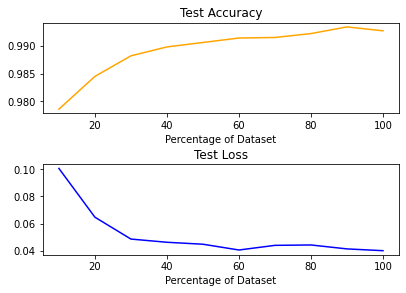

In [109]:
plot_scores(score, dataPercentage)
with open('data_size.txt', 'w') as filehandle:
    json.dump(score, filehandle)

## Training set size and effect on results
So far we tested training the same model on multiple datasets, or rather multiple portions of one dataset. I chose to use the same portions of the dataset only adding on more to keep the results more predictable. I figured jumbling the data may show some more odd or different results, but it did show to be a logarithmic relationship which was expected.

Interestingly, the accuracy went down slightly from 90% of the data to 100%, however the loss continued to trend down.

In [73]:
def test_corruption(corruptList, model):
    
    history = []
    score = []
    batch_size = 128
    epochs = 10

    
    # model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    for corruptPercentage in corruptList:
        
        y_train_corrupt = copy.deepcopy(y_train)
        randNums = []
        
        print('Corrupting: ', int((len(y_train))*(corruptPercentage/100)), 'Entries of Data', )
        # corruption loop
        for num in range(0, int((len(y_train)-1)*(corruptPercentage/100))):
            
            # seed random number generator
            seed()
            randNum = randint(0, len(y_train)-1)
            
            # catch if we've already used the random index
            while randNum in randNums:
                randNum = randint(0, len(y_train)-1)
            
            randNums.append(randNum)
            oldY_train = np.array(y_train_corrupt[randNum])
            # zero out the array
            y_train_corrupt[randNum] = np.zeros(len(y_train_corrupt[randNum]))
            y_train_corrupt[randNum][randint(0, len(y_train_corrupt[randNum])-1)] = 1.0
            
            # catch if we haven't properly jumbled the information
            while np.array_equal(y_train_corrupt[randNum], oldY_train):
                y_train_corrupt[randNum] = np.zeros(len(y_train_corrupt[randNum]))
                y_train_corrupt[randNum][randint(0, len(y_train_corrupt[randNum])-1)] = 1.0
        
        history.append(model.fit(x_train, y_train_corrupt, batch_size=batch_size, epochs=epochs, validation_split=0.1))

        model.save(str(corruptPercentage) + '%_Corruption_MNIST.h5')
        score.append(model.evaluate(x_test, y_test, verbose=0))
    
    return history, score

In [74]:
# percentages at which to corrupt the training data
corruptList = [0.5, 1, 2, 4, 8, 16]

history, corruptScore = test_corruption(corruptList, model)

Corrupting:  300 Entries of Data
Epoch 1/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0777 - accuracy: 0.9917 - val_loss: 0.0301 - val_accuracy: 0.9923
Epoch 2/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0479 - accuracy: 0.9945 - val_loss: 0.0299 - val_accuracy: 0.9922
Epoch 3/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0361 - accuracy: 0.9952 - val_loss: 0.0315 - val_accuracy: 0.9917
Epoch 4/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0270 - accuracy: 0.9953 - val_loss: 0.0301 - val_accuracy: 0.9920
Epoch 5/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0194 - accuracy: 0.9959 - val_loss: 0.0325 - val_accuracy: 0.9913
Epoch 6/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0133 - accuracy: 0.9970 - val_loss: 0.0384 - val_accuracy: 0.9902
Epoch 7/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0083 - accuracy: 0.9980 - val_lo

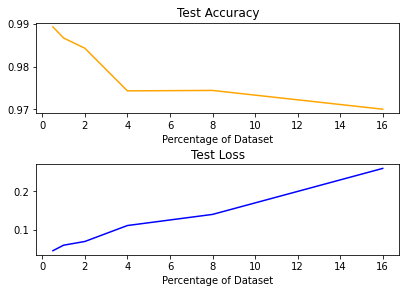

In [110]:
plot_scores(corruptScore, corruptList)
with open('corrupt.txt', 'w') as filehandle:
    json.dump(corruptScore, filehandle)

## Training set corruption and effect on results
Moving on from our previous experiment changing the range of data used for training, I then tested what happens to the training when data gets corrupted before training. To do this I randomly changed the y_train arrays for random indices of that larger array. We made sure that everything was only changed once, and that it was indeed changed in order to verify that we're doing what's expected.

The results are quite interesting, the accuracy did not fall nearly as much as I expected, but the loss grew linearly with the amount of corruption taking place. We can see that these models get pretty bad at only 2-4% of corruption.

In [33]:
def define_model_smallVGG(kernelSize=(3, 3), poolSize=(3, 3), denseSize=256, input_shape=(28, 28, 1)):
    
    print(kernelSize)
    print(poolSize)
    print(denseSize)
    model = Sequential()
    model.add(Conv2D(32, kernelSize, activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(poolSize))
    # Padding = 'same' required for negative value errors
    model.add(Conv2D(64, kernel_size=kernelSize, activation="relu", padding='same'))
    model.add(MaxPooling2D(pool_size=poolSize, padding='same'))      
    model.add(Conv2D(64, kernel_size=kernelSize, activation="relu", padding='same'))
    model.add(MaxPooling2D(pool_size=poolSize, padding='same'))
    model.add(Conv2D(128, kernel_size=kernelSize, activation="relu", padding='same'))
    model.add(MaxPooling2D(pool_size=poolSize, padding='same'))
    model.add(Conv2D(128, kernel_size=kernelSize, activation="relu", padding='same'))
    model.add(MaxPooling2D(pool_size=poolSize, padding='same'))
    model.add(Flatten())
    model.add(Dense(denseSize, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model

In [36]:
def test_smallVGG_settings(kernelList, poolList, denseList, data_name, input_shape=(28, 28, 1)):
    
    history = []
    score = []
    batch_size = 128
    epochs = 10

    scores = []
    histories = []
    for kernel in kernelList:
        
        VGGmodel = define_model_smallVGG(kernelSize=kernel, input_shape=input_shape)
        histories.append(VGGmodel.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1))
        VGGmodel.save(str(kernel) + '_kernel_' + data_name + '.h5')
        scores.append(VGGmodel.evaluate(x_test, y_test, verbose=0))
    
    score.append(scores)
    history.append(histories)
    scores = []
    histories = []
    
    for pool in poolList:
        
        VGGmodel = define_model_smallVGG(poolSize=pool, input_shape=input_shape)
        histories.append(VGGmodel.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1))
        VGGmodel.save(str(pool) + '_pool_' + data_name + '.h5')
        scores.append(VGGmodel.evaluate(x_test, y_test, verbose=0))
        
    score.append(scores)
    history.append(histories)
    scores = []
    histories = []
    
    for density in denseList:
        
        VGGmodel = define_model_smallVGG(denseSize=density, input_shape=input_shape)
        histories.append(VGGmodel.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1))
        VGGmodel.save(str(density) + '_dense_' + data_name + '.h5')
        scores.append(VGGmodel.evaluate(x_test, y_test, verbose=0))
    
    score.append(scores)
    history.append(histories)
    
    return history, score

In [37]:
kernelList = [(2, 2), (3, 3), (4, 4), (5, 5), (6, 6)]
poolList = [(2, 2), (3, 3), (4, 4), (5, 5), (6, 6)]
denseList = [16, 32, 64, 128, 256, 512]

vggHistory, vggScores = test_smallVGG_settings(kernelList, poolList, denseList, 'MNIST')

(2, 2)
(3, 3)
256
Epoch 1/10
422/422 [==============================] - 4s 10ms/step - loss: 0.7522 - accuracy: 0.7289 - val_loss: 0.1659 - val_accuracy: 0.9478
Epoch 2/10
422/422 [==============================] - 4s 10ms/step - loss: 0.1692 - accuracy: 0.9464 - val_loss: 0.1300 - val_accuracy: 0.9557
Epoch 3/10
422/422 [==============================] - 4s 10ms/step - loss: 0.1144 - accuracy: 0.9636 - val_loss: 0.0854 - val_accuracy: 0.9723
Epoch 4/10
422/422 [==============================] - 4s 10ms/step - loss: 0.0892 - accuracy: 0.9717 - val_loss: 0.0958 - val_accuracy: 0.9697
Epoch 5/10
422/422 [==============================] - 4s 10ms/step - loss: 0.0730 - accuracy: 0.9766 - val_loss: 0.0615 - val_accuracy: 0.9805
Epoch 6/10
422/422 [==============================] - 4s 10ms/step - loss: 0.0636 - accuracy: 0.9799 - val_loss: 0.0516 - val_accuracy: 0.9840
Epoch 7/10
422/422 [==============================] - 4s 10ms/step - loss: 0.0529 - accuracy: 0.9831 - val_loss: 0.1226 - va

In [42]:
# flattens lists and removes duplicate entries
def flatten_rmDuplicates(lst):
    lst = list(sum(lst, ()))
    lst = list(dict.fromkeys(lst))
    return lst

In [13]:
# save the data for later use
with open('vgg_testing.txt', 'w') as filehandle:
    json.dump(vggScores, filehandle)
print(vggScores)

[[[0.05258927121758461, 0.9819999933242798], [0.04251132160425186, 0.9866999983787537], [0.04034252464771271, 0.9868999719619751], [0.08158647269010544, 0.9757000207901001], [0.034223832190036774, 0.9904999732971191]], [[0.03389531373977661, 0.9907000064849854], [0.03532779589295387, 0.9890000224113464], [0.044822808355093, 0.9857000112533569], [0.09554267674684525, 0.9713000059127808], [0.09671535342931747, 0.970300018787384]], [[0.05912013724446297, 0.9836999773979187], [0.039757754653692245, 0.9860000014305115], [0.03298841416835785, 0.9902999997138977], [0.041540466248989105, 0.9872999787330627], [0.036464329808950424, 0.9889000058174133], [0.053275469690561295, 0.9840999841690063]]]


In [ ]:
# reload data
with open('vgg_testing.txt', 'r') as filehandle:
    vggScores = json.loads(filehandle)

In [44]:
def plot_VGG_data(vggScores, x_axis, name, baseCase):
    scoreTranspose = np.array(vggScores).T
    pyplot.subplot(2, 1, 1)
    pyplot.title(name + ' Size Accuracy')
    pyplot.xlabel(name + ' Size')
    pyplot.plot(x_axis, scoreTranspose[1], color='orange', label='Accuracy')
    pyplot.plot(x_axis, baseCase[1], color='red', label='Base Case')
    pyplot.tight_layout(pad=2)
    pyplot.subplot(2, 1, 2)
    pyplot.title(name + ' Size Loss')
    pyplot.xlabel(name + ' Size')
    pyplot.plot(x_axis, scoreTranspose[0], color='blue', label='Loss')
    pyplot.plot(x_axis, baseCase[0], color='red', label='Base Case')
    pyplot.show()

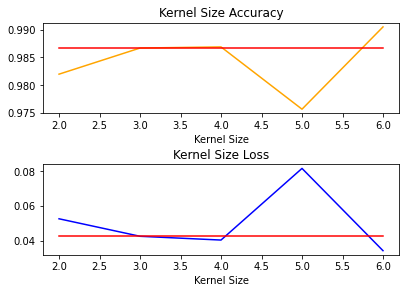

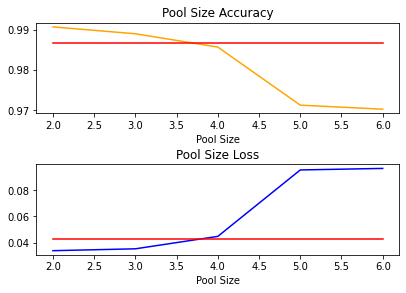

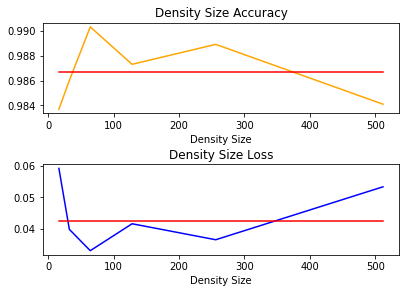

In [39]:
# Create a base VGG score in the same dimensions as our x-axis
names = ['Kernel', 'Pool', 'Density']
for j, name in enumerate(names):
    baseCase = []
    if name == 'Kernel':
        x_axis = flatten_rmDuplicates(kernelList)
    if name == 'Pool':
        x_axis = flatten_rmDuplicates(poolList)
    if name == 'Density':
        x_axis = denseList
    baseCase.append([vggScores[0][1][0] for i in range(0, len(x_axis))])
    baseCase.append([vggScores[0][1][1] for i in range(0, len(x_axis))])
    plot_VGG_data(vggScores[j], x_axis, name, baseCase)

## MNIST Results
The smallVGG network showed to be pretty accurate for identifying handwriting examples. The different setting responses were interesting, and at times unpredictable such as the kernel size tests where you get poorer performance, and then better performance with a step higher. It may be due to the size of the images and how well the kernel fit into each image with one size missing more pixels.

Density and pool size showed clear best scenarios and both had inverse relationships with their size to performance ratio after exceeding this sweet spot.

In [38]:
## Prepare the data

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# download the cifar10 data set
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
## Prepare the data

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [40]:
kernelList = [(2, 2), (3, 3), (4, 4), (5, 5), (6, 6)]
poolList = [(2, 2), (3, 3), (4, 4), (5, 5), (6, 6)]
denseList = [16, 32, 64, 128, 256, 512]

vggHistoryCifar, vggScoresCifar = test_smallVGG_settings(kernelList, poolList, denseList, 'CIFAR', input_shape=input_shape)

(2, 2)
(3, 3)
256
Epoch 1/10
352/352 [==============================] - 5s 14ms/step - loss: 1.7944 - accuracy: 0.3122 - val_loss: 1.5854 - val_accuracy: 0.4018
Epoch 2/10
352/352 [==============================] - 5s 14ms/step - loss: 1.4749 - accuracy: 0.4436 - val_loss: 1.3676 - val_accuracy: 0.4844
Epoch 3/10
352/352 [==============================] - 5s 14ms/step - loss: 1.3171 - accuracy: 0.5121 - val_loss: 1.2863 - val_accuracy: 0.5254
Epoch 4/10
352/352 [==============================] - 5s 14ms/step - loss: 1.2097 - accuracy: 0.5541 - val_loss: 1.1907 - val_accuracy: 0.5688
Epoch 5/10
352/352 [==============================] - 5s 14ms/step - loss: 1.1277 - accuracy: 0.5906 - val_loss: 1.0752 - val_accuracy: 0.6126
Epoch 6/10
352/352 [==============================] - 5s 14ms/step - loss: 1.0608 - accuracy: 0.6162 - val_loss: 1.0502 - val_accuracy: 0.6130
Epoch 7/10
352/352 [==============================] - 5s 14ms/step - loss: 1.0098 - accuracy: 0.6349 - val_loss: 1.0431 - va

In [56]:
# save the data for later use
with open('vgg_testing_cifar.txt', 'w') as filehandle:
    json.dump(vggScoresCifar, filehandle)

In [ ]:
# reload data
with open('vgg_testing_cifar.txt', 'r') as filehandle:
    vggScores = json.loads(filehandle)

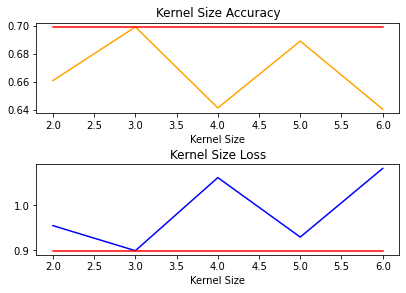

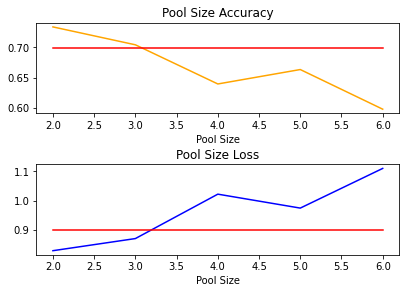

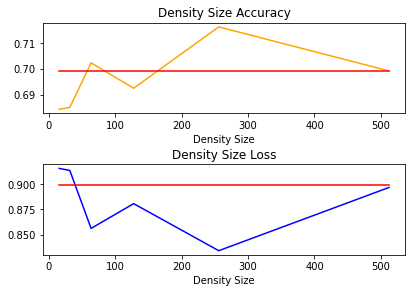

In [45]:
# Create a base VGG score in the same dimensions as our x-axis
names = ['Kernel', 'Pool', 'Density']
for j, name in enumerate(names):
    baseCase = []
    if name == 'Kernel':
        x_axis = flatten_rmDuplicates(kernelList)
    if name == 'Pool':
        x_axis = flatten_rmDuplicates(poolList)
    if name == 'Density':
        x_axis = denseList
    baseCase.append([vggScoresCifar[0][1][0] for i in range(0, len(x_axis))])
    baseCase.append([vggScoresCifar[0][1][1] for i in range(0, len(x_axis))])
    plot_VGG_data(vggScoresCifar[j], x_axis, name, baseCase)

## CIFAR Results
Here I compared the results of the CIFAR dataset using the same smallVGG settings as the previous MNIST data set. It is quite clear that this dataset training requires a far more complicated neural network than the one required to achieve good results with the MNIST dataset.

The results were also all over the place, so this network would need to be expanded and tested further to find the best setup for this application.

In [76]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = load_model('(3, 3)_kernel_MNIST.h5')
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 1, 128)        

In [70]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
#y_pred = model.predict(x_test)
print(np.shape(y_pred))
print(np.shape(y_test))
#confusion = confusion_matrix(y_test, y_pred)
conf_matrix = math.confusion_matrix(labels=np.argmax(y_test, axis = 1), predictions=y_pred, dtype=dtypes.float32).numpy()

(10000,)
(10000, 10)


In [71]:
print(conf_matrix)

[[9.720e+02 0.000e+00 3.000e+00 0.000e+00 3.000e+00 0.000e+00 2.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 1.132e+03 0.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00
  1.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 0.000e+00 1.024e+03 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  6.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 1.000e+00 2.000e+00 1.000e+03 0.000e+00 6.000e+00 0.000e+00
  1.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 9.820e+02 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 5.000e+00 0.000e+00 8.840e+02 1.000e+00
  1.000e+00 0.000e+00 0.000e+00]
 [3.000e+00 1.000e+00 0.000e+00 0.000e+00 2.000e+00 4.000e+00 9.480e+02
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 2.000e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.020e+03 1.000e+00 0.000e+00]
 [3.000e+00 1.000e+00 2.000e+00 1.000e+00 1.000e+00 4.000e+00 3.000e+00
  1.000e+00 9.560e+02 2.000e+00]
 [0.000e+00 0.000e+00 2.000e+00 1.000e+00 2.200e+01 4.0

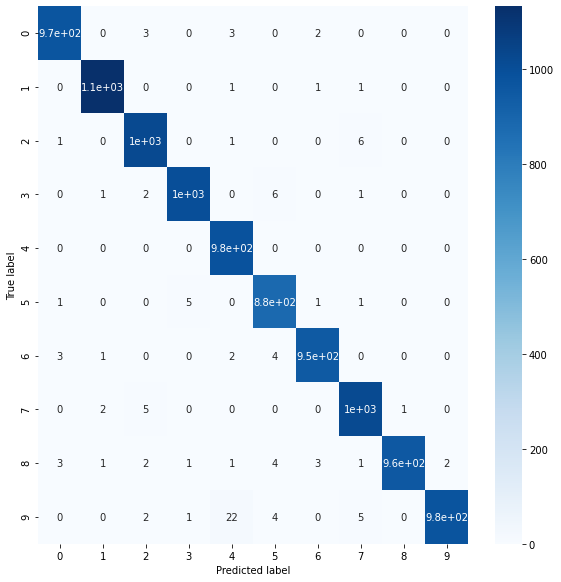

In [75]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## MNIST Confusion Matrix
I chose to use the smallVGG base setup to calculation the confusion matrix of the MNIST data set. We can see a couple interesting things here with a few numbers in particular standing out.

Of all the numbers, 9's are predicted incorrectly the most with 4 being the biggest offender. Knowing what some of the images look like, this makes a lot of sense as they can look very similar. I was quite surprised that 3's and 8's didn't have that much of a mixup, but that's why these exercises are important to do as sometimes there are unintuitive issues with big problems and solutions.

In [77]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# download the cifar10 data set
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
## Prepare the data

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = load_model('(3, 3)_kernel_CIFAR.h5')
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 2, 2, 128)       

In [78]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
#y_pred = model.predict(x_test)
print(np.shape(y_pred))
print(np.shape(y_test))
#confusion = confusion_matrix(y_test, y_pred)
conf_matrix = math.confusion_matrix(labels=np.argmax(y_test, axis = 1), predictions=y_pred, dtype=dtypes.float32).numpy()

(10000,)
(10000, 10)


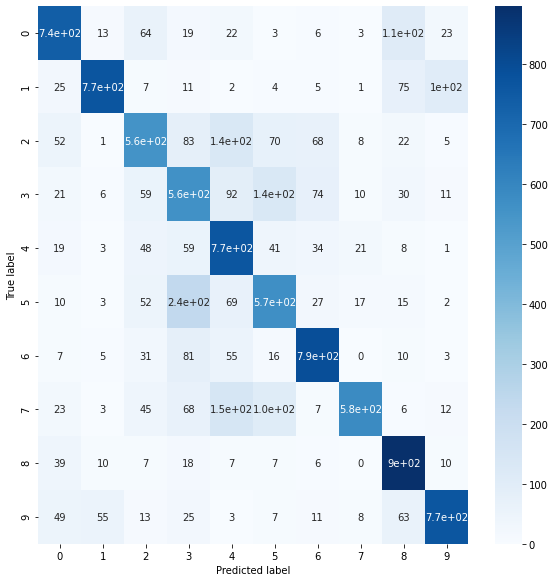

In [79]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## CIFAR Confusion Matrix
This matrix shows that the results are kind of all over the place, similar to the results we found earlier of simply looking at the accuracy and loss functions of both. 

I did find it quite interesting that airplanes and birds got mixed up quite a bit. Beyond this relationship, the animals seemed to get mixed up the most with other animals and had fewer issues with the more mechanical objects in the dataset. This shows that the neural network is on the right path, just that it needs a lot more tuning to get it more accurate to be viable for use.
